# Import Libraries

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Read Data

In [71]:
df = pd.read_csv('fedex_logistics_2000.csv')

# Basic Explorations

In [72]:
df.head(10)

,ShipmentID,Date,Origin,Destination,Distance_km,Weight_kg,ShippingMode,EstimatedTime_days,DeliveryTime_days,Delay_hours,FuelCost_USD,TotalCost_USD,PackageValue_USD,CustomerRating,WeatherDelay,TrafficDelay,LostOrDamaged
0,FDX000473,2023-01-19,Atlanta,Mumbai,3800,8.22,Ground,6,5.0,0,2.19,104.01,70.35,4.0,No,No,No
1,FDX000746,2024-08-23,Los Angeles,Mexico City,4540,24.31,Air,3,2.0,0,6.36,163.50,51.28,4.0,No,No,No
2,FDX000678,2023-10-03,Chicago,Mexico City,3211,9.67,Air,1,1.0,1,6.20,107.16,27.94,4.0,No,No,No
3,FDX001878,2023-12-13,Miami,Dubai,4819,12.31,Air,2,1.0,0,7.64,148.92,103.11,4.0,No,No,No
4,FDX001820,2023-10-08,San Francisco,London,2125,9.63,Ground,4,3.0,0,2.27,73.57,16.65,3.0,No,No,No
5,FDX001313,2023-02-20,Dallas,Toronto,5165,12.03,Ground,8,7.0,0,5.54,148.98,20.16,4.0,No,No,No
6,FDX001678,2023-08-06,Miami,Toronto,5158,20.73,Air,3,2.0,0,6.86,170.20,62.74,4.0,No,No,No
7,FDX001546,2023-03-21,Los Angeles,Tokyo,3963,31.04,Air,1,1.0,0,3.58,157.08,33.97,5.0,No,No,No
8,FDX000419,2023-01-30,Seattle,Toronto,2120,1.50,Ground,3,3.0,0,2.46,57.78,170.61,3.0,No,No,Yes
9,FDX000181,2023-01-06,Miami,London,6848,7.27,Ground,9,9.0,22,5.34,172.52,49.85,5.0,No,No,No


In [73]:
df.describe() # summary stats of numerical columns

,Distance_km,Weight_kg,EstimatedTime_days,DeliveryTime_days,Delay_hours,FuelCost_USD,TotalCost_USD,PackageValue_USD,CustomerRating
count,2010.000000,1990.000000,2010.000000,1990.000000,2010.000000,1990.000000,2010.000000,2010.000000,1990.000000
mean,3284.077612,19.373889,2.790547,3.179899,19.578109,4.237804,150.555303,66.494010,4.059296
std,1362.876672,14.010022,1.888481,2.200096,27.916004,2.292984,82.927596,81.096551,0.938802
min,50.000000,0.110000,1.000000,1.000000,0.000000,0.040000,15.220000,10.000000,1.000000
25%,2339.250000,8.287500,1.000000,1.000000,0.000000,2.532500,95.722500,20.525000,4.000000
50%,3243.500000,16.815000,2.000000,3.000000,5.000000,3.915000,127.315000,40.750000,4.000000
75%,4201.000000,27.990000,4.000000,4.000000,27.750000,5.537500,170.840000,80.350000,5.000000
max,8614.000000,77.440000,11.000000,14.000000,181.000000,13.280000,460.320000,1175.810000,5.000000


In [74]:
df.shape

(2010, 17)

In [75]:
df.dtypes

ShipmentID             object
Date                   object
Origin                 object
Destination            object
Distance_km             int64
Weight_kg             float64
ShippingMode           object
EstimatedTime_days      int64
DeliveryTime_days     float64
Delay_hours             int64
FuelCost_USD          float64
TotalCost_USD         float64
PackageValue_USD      float64
CustomerRating        float64
WeatherDelay           object
TrafficDelay           object
LostOrDamaged          object
dtype: object

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ShipmentID          2010 non-null   object 
 1   Date                2010 non-null   object 
 2   Origin              2010 non-null   object 
 3   Destination         2010 non-null   object 
 4   Distance_km         2010 non-null   int64  
 5   Weight_kg           1990 non-null   float64
 6   ShippingMode        2010 non-null   object 
 7   EstimatedTime_days  2010 non-null   int64  
 8   DeliveryTime_days   1990 non-null   float64
 9   Delay_hours         2010 non-null   int64  
 10  FuelCost_USD        1990 non-null   float64
 11  TotalCost_USD       2010 non-null   float64
 12  PackageValue_USD    2010 non-null   float64
 13  CustomerRating      1990 non-null   float64
 14  WeatherDelay        2010 non-null   object 
 15  TrafficDelay        2010 non-null   object 
 16  LostOr

In [77]:
# Count how many shipments were sent from each Origin.

df.groupby('Origin')['ShipmentID'].count()

Origin
Atlanta          194
Chicago          186
Dallas           202
Denver           225
Houston          196
Los Angeles      202
Miami            210
New York         185
San Francisco    218
Seattle          192
Name: ShipmentID, dtype: int64

In [78]:
# Identitfy the unique shipping modes.

df.ShippingMode.unique()

array(['Ground', 'Air', 'Express'], dtype=object)

In [79]:
# find the average delivery time

df['DeliveryTime_days'].mean()

3.1798994974874373

In [80]:
# Average delivery time of each origin

df.groupby('Origin')['DeliveryTime_days'].mean()

Origin
Atlanta          2.958549
Chicago          3.086022
Dallas           3.120603
Denver           3.044843
Houston          3.255208
Los Angeles      2.686567
Miami            3.840580
New York         4.005464
San Francisco    2.940092
Seattle          2.920635
Name: DeliveryTime_days, dtype: float64

In [81]:
# Check how many shipments were delivered late (Delay_hours > 0).

df.groupby(['Origin','ShipmentID'])['Delay_hours'].mean()

Origin   ShipmentID
Atlanta  FDX000018      7.0
         FDX000044      5.0
         FDX000046      0.0
         FDX000051      0.0
         FDX000085      4.0
                       ... 
Seattle  FDX001960      0.0
         FDX001986      0.0
         FDX001989      0.0
         FDX001990      0.0
         FDX001991     42.0
Name: Delay_hours, Length: 2000, dtype: float64

In [82]:
df.columns

Index(['ShipmentID', 'Date', 'Origin', 'Destination', 'Distance_km',
       'Weight_kg', 'ShippingMode', 'EstimatedTime_days', 'DeliveryTime_days',
       'Delay_hours', 'FuelCost_USD', 'TotalCost_USD', 'PackageValue_USD',
       'CustomerRating', 'WeatherDelay', 'TrafficDelay', 'LostOrDamaged'],
      dtype='object')

In [83]:
# Display the top 5 most expensive shipments.
df.sort_values(by = 'TotalCost_USD', ascending = False).head(5)

,ShipmentID,Date,Origin,Destination,Distance_km,Weight_kg,ShippingMode,EstimatedTime_days,DeliveryTime_days,Delay_hours,FuelCost_USD,TotalCost_USD,PackageValue_USD,CustomerRating,WeatherDelay,TrafficDelay,LostOrDamaged
982,FDX001055,2023-03-28,New York,Toronto,5295,64.15,Express,3,7.0,100,7.04,460.32,50.14,5.0,Yes,Yes,No
324,FDX001602,2023-06-20,San Francisco,London,5186,56.08,Express,3,2.0,0,8.15,445.33,219.85,4.0,No,No,No
924,FDX001673,2023-03-26,Seattle,Mexico City,4921,57.03,Express,3,3.0,0,8.20,442.08,21.61,4.0,No,No,No
1824,FDX001507,2023-05-28,Chicago,Mexico City,3520,63.05,Express,2,2.0,14,5.96,419.38,91.00,3.0,No,Yes,No
1193,FDX001840,2023-06-26,Miami,Singapore,5649,37.90,Express,3,3.0,0,8.08,418.02,27.91,4.0,No,No,No


In [84]:
# Find the total revenue from TotalCost_USD.

df['TotalCost_USD'].sum()

302616.16

# Handling Missing Values

In [85]:
# Count missing values in each column.

df.isnull().sum()

ShipmentID             0
Date                   0
Origin                 0
Destination            0
Distance_km            0
Weight_kg             20
ShippingMode           0
EstimatedTime_days     0
DeliveryTime_days     20
Delay_hours            0
FuelCost_USD          20
TotalCost_USD          0
PackageValue_USD       0
CustomerRating        20
WeatherDelay           0
TrafficDelay           0
LostOrDamaged          0
dtype: int64

In [86]:
# Replace missing DeliveryTime_days with the column median.

median = df['DeliveryTime_days'].median()
df['DeliveryTime_days'].fillna(median,inplace = True)

In [87]:
df.isnull().sum()

ShipmentID             0
Date                   0
Origin                 0
Destination            0
Distance_km            0
Weight_kg             20
ShippingMode           0
EstimatedTime_days     0
DeliveryTime_days      0
Delay_hours            0
FuelCost_USD          20
TotalCost_USD          0
PackageValue_USD       0
CustomerRating        20
WeatherDelay           0
TrafficDelay           0
LostOrDamaged          0
dtype: int64

In [88]:
df['Distance_km'].dropna(inplace=True)

In [89]:
df.isnull().sum()

ShipmentID             0
Date                   0
Origin                 0
Destination            0
Distance_km            0
Weight_kg             20
ShippingMode           0
EstimatedTime_days     0
DeliveryTime_days      0
Delay_hours            0
FuelCost_USD          20
TotalCost_USD          0
PackageValue_USD       0
CustomerRating        20
WeatherDelay           0
TrafficDelay           0
LostOrDamaged          0
dtype: int64

In [90]:
# Impute missing CustomerRating with mode.

mode_value = df['CustomerRating'].mode().iloc[0]
df['CustomerRating'] = df['CustomerRating'].fillna(mode_value)


In [91]:
df.isnull().sum()

ShipmentID             0
Date                   0
Origin                 0
Destination            0
Distance_km            0
Weight_kg             20
ShippingMode           0
EstimatedTime_days     0
DeliveryTime_days      0
Delay_hours            0
FuelCost_USD          20
TotalCost_USD          0
PackageValue_USD       0
CustomerRating         0
WeatherDelay           0
TrafficDelay           0
LostOrDamaged          0
dtype: int64

In [92]:
# Fill missing FuelCost_USD using forward fill.

df['FuelCost_USD'] = df['FuelCost_USD'].fillna(method = 'ffill')

In [93]:
df.isnull().sum()

ShipmentID             0
Date                   0
Origin                 0
Destination            0
Distance_km            0
Weight_kg             20
ShippingMode           0
EstimatedTime_days     0
DeliveryTime_days      0
Delay_hours            0
FuelCost_USD           0
TotalCost_USD          0
PackageValue_USD       0
CustomerRating         0
WeatherDelay           0
TrafficDelay           0
LostOrDamaged          0
dtype: int64

In [94]:
df['Weight_kg'] = df['Weight_kg'].fillna(np.random.rand())

In [95]:
df.isnull().sum()

ShipmentID            0
Date                  0
Origin                0
Destination           0
Distance_km           0
Weight_kg             0
ShippingMode          0
EstimatedTime_days    0
DeliveryTime_days     0
Delay_hours           0
FuelCost_USD          0
TotalCost_USD         0
PackageValue_USD      0
CustomerRating        0
WeatherDelay          0
TrafficDelay          0
LostOrDamaged         0
dtype: int64

# Handling Duplicates

In [96]:
df.duplicated().sum()

10

In [97]:
# Check if there are duplicate ShipmentID records.

df['ShipmentID'].duplicated().sum()

10

In [98]:
# Remove duplicate rows and count how many were deleted.

df['ShipmentID'] = df['ShipmentID'].drop_duplicates()

In [99]:
df.duplicated().sum()

0

# Univariate Analysis

<Axes: xlabel='Distance_km', ylabel='Count'>

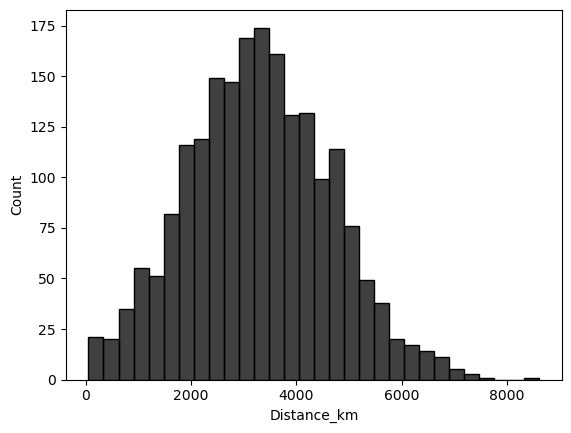

In [100]:
# Plot histogram of Distance_km.

sns.histplot(data = df['Distance_km'], color = 'black')

<Axes: xlabel='DeliveryTime_days', ylabel='Density'>

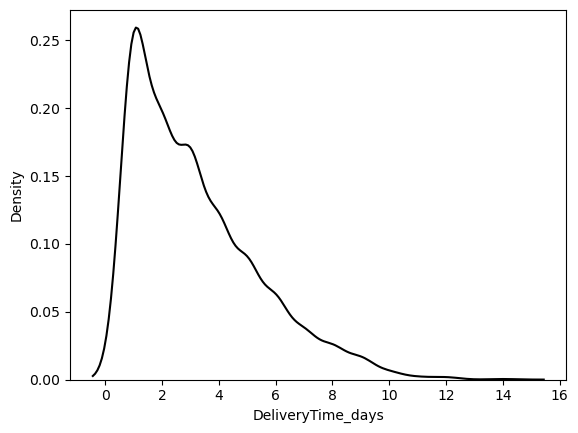

In [101]:
# Plot distribution of DeliveryTime_days.

sns.kdeplot(data = df['DeliveryTime_days'], color = 'black')

In [102]:
# Find mean, median, mode of Weight_kg.

mean = round(df['Weight_kg'].mean(),2)
median = round(df['Weight_kg'].median(),1)
mode = round(df['Weight_kg'].mode(),2)

print(mean)
print(median)
print(mode)

19.18
16.7
0    0.12
Name: Weight_kg, dtype: float64


In [103]:
# Calculate variance & standard deviation of TotalCost_USD.

var = round(df['TotalCost_USD'].var(),2)
std = round(df['TotalCost_USD'].std(),2)
print(var)
print(std)


6876.99
82.93


In [104]:
# Identify outliers in DeliveryTime_days using IQR.

Q1 = df['DeliveryTime_days'].quantile(0.25)
Q3 = df['DeliveryTime_days'].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)

print(lower_bound)
print(upper_bound)

outlier_mask = (df['DeliveryTime_days'] < lower_bound) | (df['DeliveryTime_days'] > upper_bound)
outliers = df[outlier_mask]

-3.5
8.5


In [105]:
df.head()

,ShipmentID,Date,Origin,Destination,Distance_km,Weight_kg,ShippingMode,EstimatedTime_days,DeliveryTime_days,Delay_hours,FuelCost_USD,TotalCost_USD,PackageValue_USD,CustomerRating,WeatherDelay,TrafficDelay,LostOrDamaged
0,FDX000473,2023-01-19,Atlanta,Mumbai,3800,8.22,Ground,6,5.0,0,2.19,104.01,70.35,4.0,No,No,No
1,FDX000746,2024-08-23,Los Angeles,Mexico City,4540,24.31,Air,3,2.0,0,6.36,163.50,51.28,4.0,No,No,No
2,FDX000678,2023-10-03,Chicago,Mexico City,3211,9.67,Air,1,1.0,1,6.20,107.16,27.94,4.0,No,No,No
3,FDX001878,2023-12-13,Miami,Dubai,4819,12.31,Air,2,1.0,0,7.64,148.92,103.11,4.0,No,No,No
4,FDX001820,2023-10-08,San Francisco,London,2125,9.63,Ground,4,3.0,0,2.27,73.57,16.65,3.0,No,No,No


{'whiskers': [<matplotlib.lines.Line2D at 0x19ff809aab0>,
 'caps': [<matplotlib.lines.Line2D at 0x19ff809af30>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ff809a7e0>],
 'medians': [<matplotlib.lines.Line2D at 0x19ff809b4a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ff809b740>],
 'means': []}

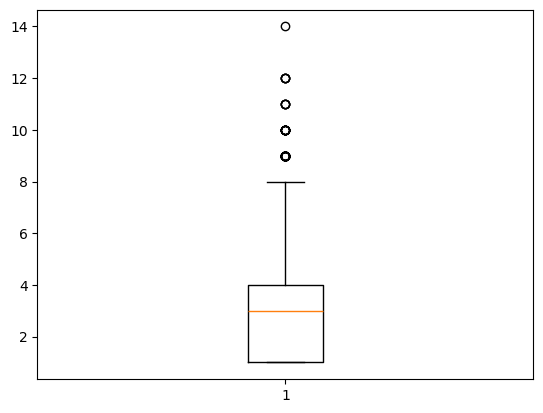

In [106]:
plt.boxplot(df['DeliveryTime_days'])

In [107]:
# Identify outliers in Weight_kg using Z-score.

from scipy.stats import zscore
df['Weight_kg'] = zscore(df['Weight_kg'])

In [108]:
z_threshold = 3

outlier_mask = (df['Weight_kg'].abs()>z_threshold)
outliers = df[outlier_mask]

<Axes: ylabel='Weight_kg'>

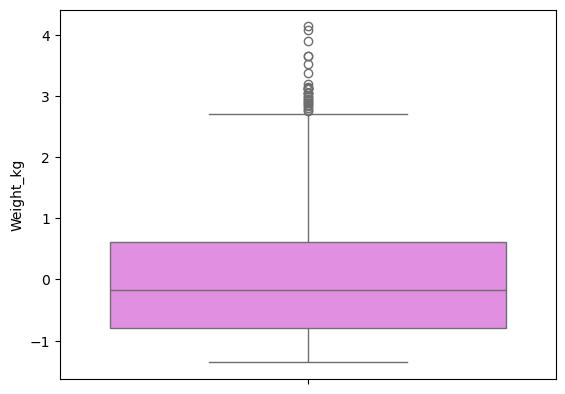

In [109]:
sns.boxplot(data=df['Weight_kg'],color = 'violet')

In [110]:
# Find the frequency count of ShippingMode.

freq_ShippingMode = df['ShippingMode'].value_counts(normalize = True)*100
freq_ShippingMode

ShippingMode
Air        50.746269
Ground     35.074627
Express    14.179104
Name: proportion, dtype: float64

<Axes: ylabel='FuelCost_USD'>

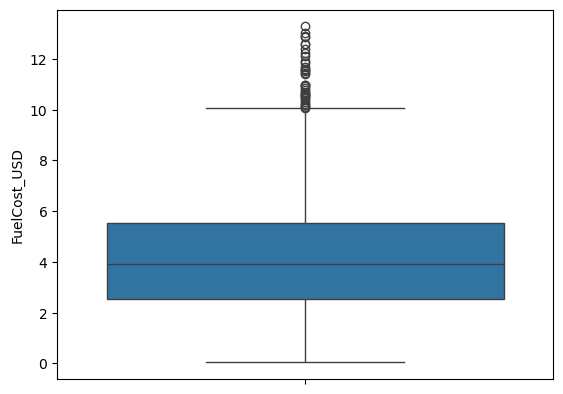

In [111]:
# Plot boxplot of FuelCost_USD

sns.boxplot(data = df['FuelCost_USD'])

# Bivariate Analysis

In [112]:
# Find correlation between Distance_km and DeliveryTime_days.

corr = df['Distance_km'].corr(df['DeliveryTime_days'])
corr

0.3903618849009109

<Axes: >

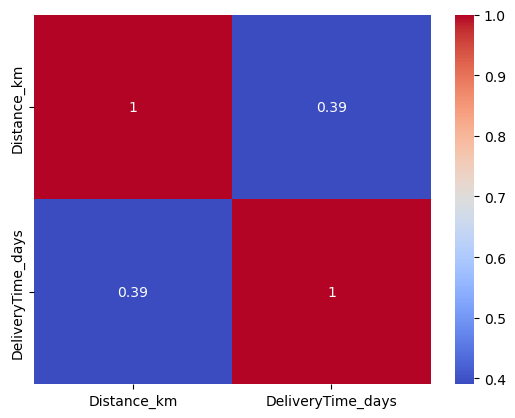

In [113]:
corr1 = df[['Distance_km','DeliveryTime_days']].corr()
sns.heatmap(data = corr1,annot=True,cmap = 'coolwarm')

<Axes: xlabel='Weight_kg', ylabel='TotalCost_USD'>

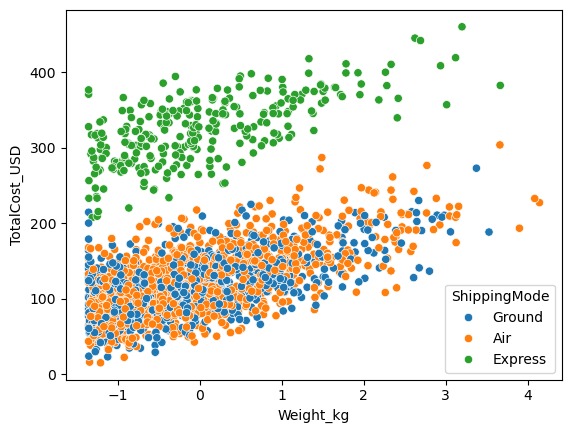

In [114]:
# Plot scatter plot of Weight_kg vs TotalCost_USD.

sns.scatterplot(data=df, x=df['Weight_kg'], y = df['TotalCost_USD'], hue = df['ShippingMode'])

<Axes: xlabel='ShippingMode', ylabel='DeliveryTime_days'>

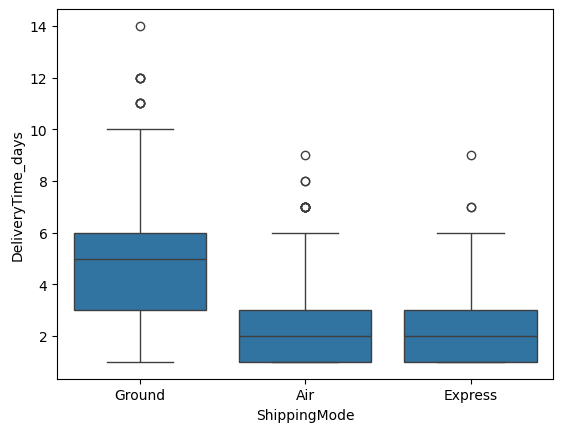

In [115]:
# Compare DeliveryTime_days for different ShippingMode (boxplot).

sns.boxplot(df, y = df['DeliveryTime_days'], x = df['ShippingMode'])

In [116]:
# Compute average DeliveryTime_days grouped by Origin.

DeliveryTime_origin_based = df.groupby('Origin')['DeliveryTime_days'].mean()
DeliveryTime_origin_based

Origin
Atlanta          2.958763
Chicago          3.086022
Dallas           3.118812
Denver           3.044444
Houston          3.250000
Los Angeles      2.688119
Miami            3.828571
New York         3.994595
San Francisco    2.940367
Seattle          2.921875
Name: DeliveryTime_days, dtype: float64

In [117]:
# Analyze relationship between PackageValue_USD and CustomerRating.

df.groupby('CustomerRating')['PackageValue_USD'].agg(Mean_value = ('mean'),
                                                     Median_Value = ('median'),
                                                     count = ('count')).reset_index()

,CustomerRating,Mean_value,Median_Value,count
0,1.0,53.342453,48.180,53
1,2.0,55.637561,46.010,82
2,3.0,65.899572,41.440,257
3,4.0,69.433522,41.505,920
4,5.0,65.112464,38.590,698


In [118]:
df.head(1)

,ShipmentID,Date,Origin,Destination,Distance_km,Weight_kg,ShippingMode,EstimatedTime_days,DeliveryTime_days,Delay_hours,FuelCost_USD,TotalCost_USD,PackageValue_USD,CustomerRating,WeatherDelay,TrafficDelay,LostOrDamaged
0,FDX000473,2023-01-19,Atlanta,Mumbai,3800,-0.779285,Ground,6,5.0,0,2.19,104.01,70.35,4.0,No,No,No


In [119]:
# Check if WeatherDelay impacts DeliveryTime_days (group comparison).

df.groupby('WeatherDelay')['DeliveryTime_days'].mean()


WeatherDelay
No     3.084423
Yes    4.166667
Name: DeliveryTime_days, dtype: float64

Observation : It clearly visible that weather delay the delivery time by 1 day

<Axes: xlabel='FuelCost_USD', ylabel='Destination'>

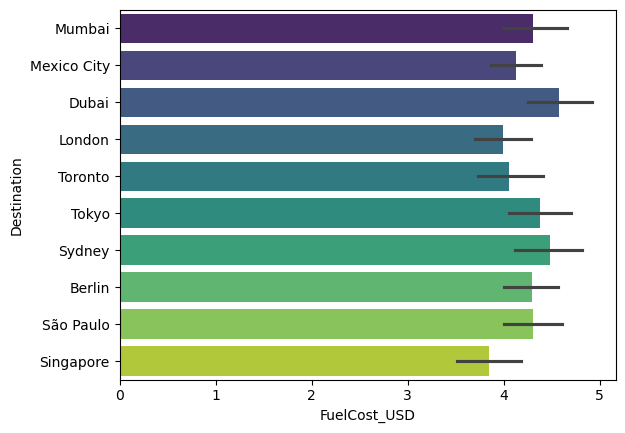

In [120]:
# Plot bar chart of average FuelCost_USD by Destination.

sns.barplot(data = df, x= df['FuelCost_USD'], y = df['Destination'], palette = 'viridis')

In [121]:
# Compute covariance matrix for numeric variables.

cov = df.cov(numeric_only = True)
cov

,Distance_km,Weight_kg,EstimatedTime_days,DeliveryTime_days,Delay_hours,FuelCost_USD,TotalCost_USD,PackageValue_USD,CustomerRating
Distance_km,1.857433e+06,-27.934239,1342.874403,1164.682038,-182.957285,2366.060104,43717.796641,-1709.113661,33.238348
Weight_kg,-2.793424e+01,1.000498,-0.062596,-0.046049,-0.212789,0.019301,28.247835,1.179471,-0.049955
EstimatedTime_days,1.342874e+03,-0.062596,3.566362,3.165248,-0.096374,0.213347,-1.571512,-0.734944,0.007823
DeliveryTime_days,1.164682e+03,-0.046049,3.165248,4.792552,34.585384,0.108252,-2.021811,0.050858,0.047777
Delay_hours,-1.829573e+02,-0.212789,-0.096374,34.585384,779.303254,-0.093969,7.447132,-1.036058,0.876448
FuelCost_USD,2.366060e+03,0.019301,0.213347,0.108252,-0.093969,5.266963,81.220425,-2.595751,0.013725
TotalCost_USD,4.371780e+04,28.247835,-1.571512,-2.021811,7.447132,81.220425,6876.986223,-112.633026,-1.395229
PackageValue_USD,-1.709114e+03,1.179471,-0.734944,0.050858,-1.036058,-2.595751,-112.633026,6576.650583,1.523149
CustomerRating,3.323835e+01,-0.049955,0.007823,0.047777,0.876448,0.013725,-1.395229,1.523149,0.872610


# Multivariate Analysis

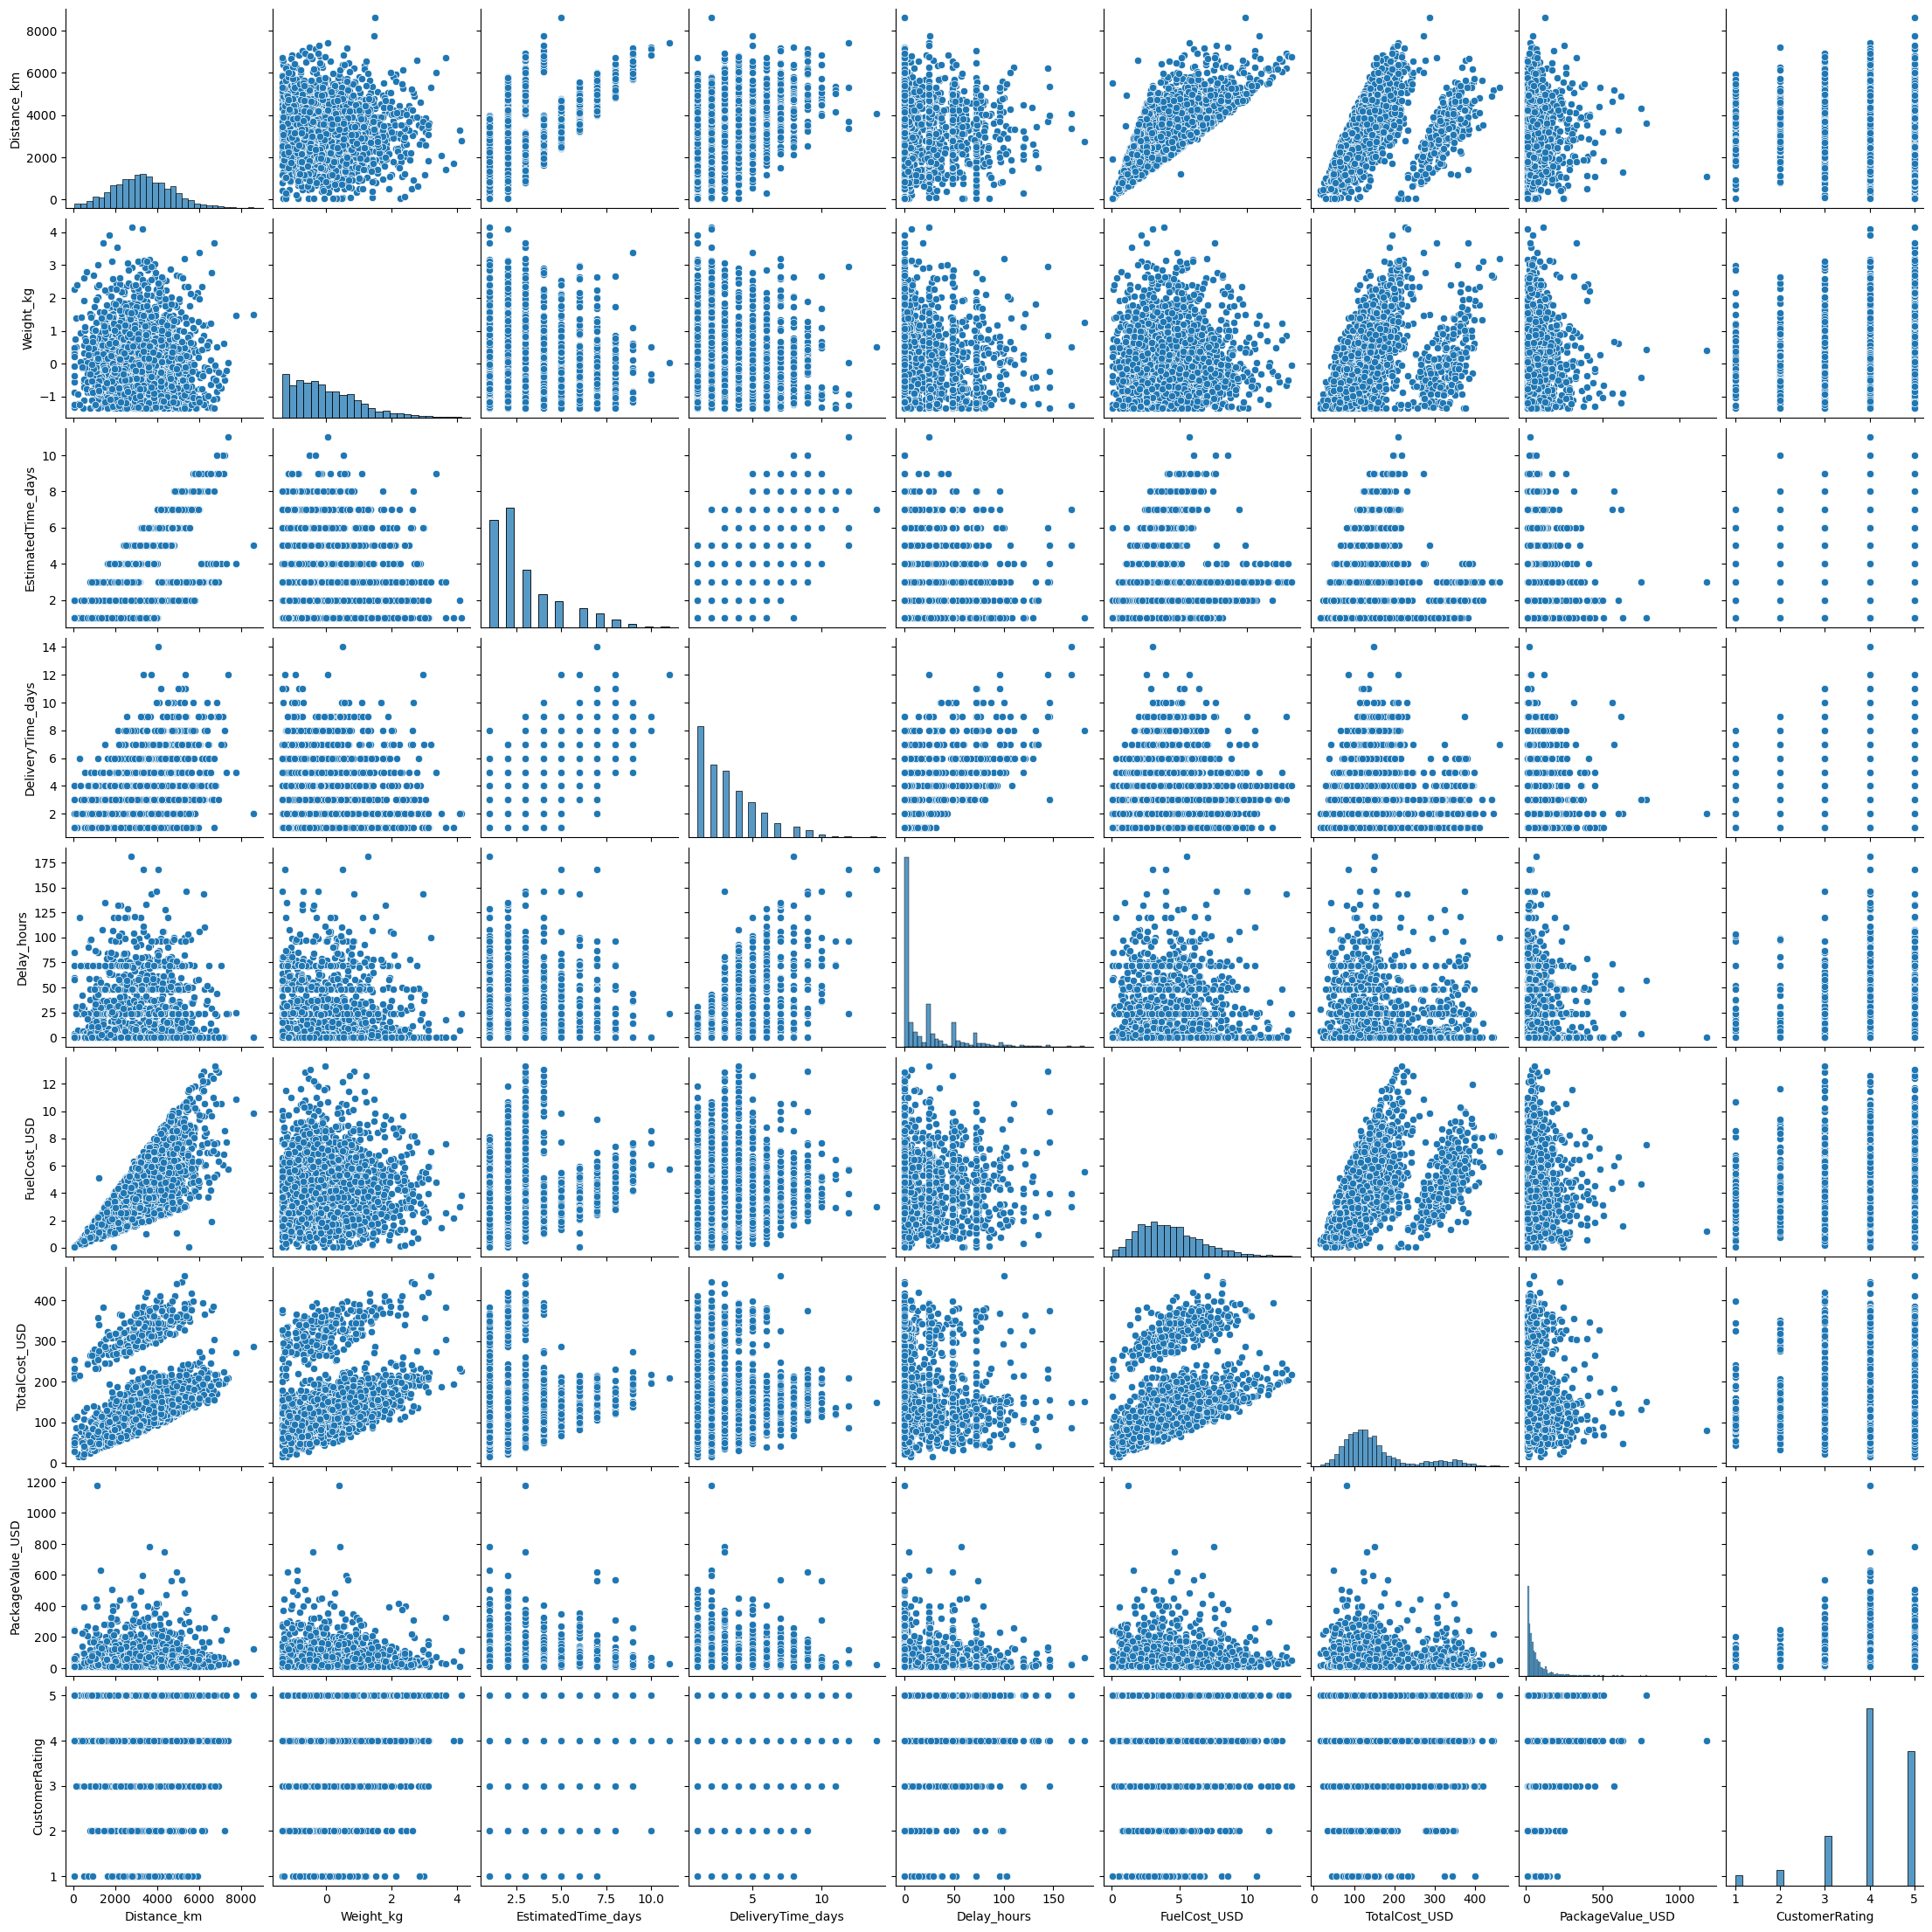

In [122]:
# Perform pairplot for key variables.

sns.pairplot(data = df)

In [123]:
# Build correlation heatmap for numeric columns.

corr = df.corr(numeric_only= True)
corr

,Distance_km,Weight_kg,EstimatedTime_days,DeliveryTime_days,Delay_hours,FuelCost_USD,TotalCost_USD,PackageValue_USD,CustomerRating
Distance_km,1.000000,-0.020491,0.521754,0.390362,-0.004809,0.756465,0.386814,-0.015464,0.026108
Weight_kg,-0.020491,1.000000,-0.033138,-0.021030,-0.007621,0.008408,0.340548,0.014540,-0.053464
EstimatedTime_days,0.521754,-0.033138,1.000000,0.765617,-0.001828,0.049226,-0.010035,-0.004799,0.004434
DeliveryTime_days,0.390362,-0.021030,0.765617,1.000000,0.565921,0.021546,-0.011137,0.000286,0.023363
Delay_hours,-0.004809,-0.007621,-0.001828,0.565921,1.000000,-0.001467,0.003217,-0.000458,0.033610
FuelCost_USD,0.756465,0.008408,0.049226,0.021546,-0.001467,1.000000,0.426762,-0.013947,0.006402
TotalCost_USD,0.386814,0.340548,-0.010035,-0.011137,0.003217,0.426762,1.000000,-0.016748,-0.018011
PackageValue_USD,-0.015464,0.014540,-0.004799,0.000286,-0.000458,-0.013947,-0.016748,1.000000,0.020106
CustomerRating,0.026108,-0.053464,0.004434,0.023363,0.033610,0.006402,-0.018011,0.020106,1.000000


<Axes: >

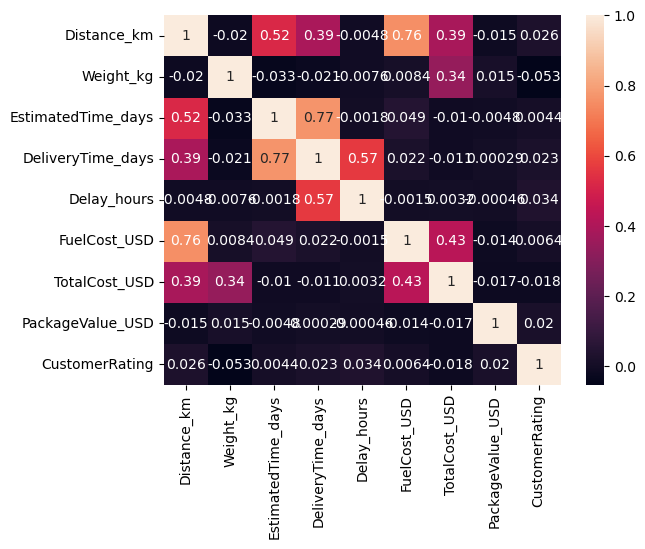

In [124]:

fig_size=(30,50)
sns.heatmap(data = corr,annot = True)

In [125]:
# Analyze delay patterns across (Origin, ShippingMode).

delay_pattern = df.groupby(['Origin','ShippingMode'])['Delay_hours'].agg(mean_delay = 'mean',
                                                                         median_delay = 'median',
                                                                         total_shipments = 'count',
                                                                         std_delay = 'std').reset_index()
delay_pattern = delay_pattern.sort_values(by = 'mean_delay',ascending = False)
delay_pattern

,Origin,ShippingMode,mean_delay,median_delay,total_shipments,std_delay
28,Seattle,Express,29.562500,24.0,32,37.562797
12,Houston,Air,27.798165,9.0,109,35.340874
22,New York,Express,26.043478,4.0,23,33.564698
3,Chicago,Air,24.735632,17.0,87,31.108385
25,San Francisco,Express,23.205882,14.0,34,28.028967
11,Denver,Ground,23.051948,13.0,77,26.473868
2,Atlanta,Ground,22.564516,12.5,62,28.314754
29,Seattle,Ground,22.430769,3.0,65,34.270965
14,Houston,Ground,22.029412,6.5,68,32.764638
18,Miami,Air,21.295918,9.0,98,27.516147


<Axes: xlabel='Origin', ylabel='mean_delay'>

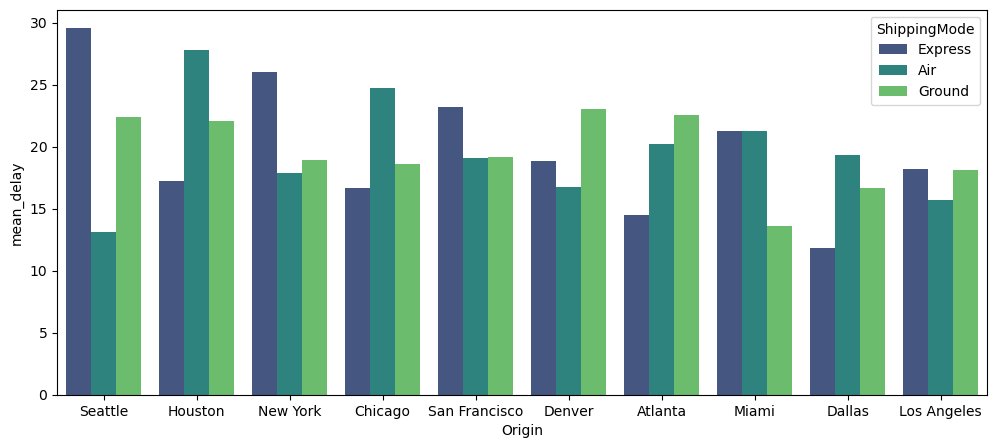

In [126]:
plt.figure(figsize = (12,5))
sns.barplot(data = delay_pattern,x='Origin', 
    y='mean_delay', 
    hue='ShippingMode',
    palette='viridis')

In [127]:
# Explore how WeatherDelay + TrafficDelay jointly affect delivery time.

df.groupby(['WeatherDelay','TrafficDelay'])['DeliveryTime_days'].mean().sort_values(ascending = False)

WeatherDelay  TrafficDelay
Yes           No              4.174497
              Yes             4.120000
No            Yes             3.354430
              No              3.044403
Name: DeliveryTime_days, dtype: float64

In [128]:
# Create pivot table: Origin vs Destination vs Avg DeliveryTime_days.

Pt = pd.pivot_table(df,values = 'DeliveryTime_days',
              index ='Origin',
              columns = 'Destination',
              aggfunc = 'mean'
              )
Pt

Destination,Berlin,Dubai,London,Mexico City,Mumbai,Singapore,Sydney,São Paulo,Tokyo,Toronto
Origin,,,,,,,,,,
Atlanta,2.833333,2.466667,3.571429,2.857143,2.230769,3.812500,3.450000,3.000000,3.384615,2.071429
Chicago,2.880000,2.785714,2.727273,3.391304,3.588235,2.933333,2.866667,3.588235,3.818182,2.000000
Dallas,3.520000,2.473684,2.631579,3.000000,2.500000,3.541667,2.666667,3.450000,3.842105,3.142857
Denver,2.800000,3.600000,3.033333,2.964286,3.517241,2.875000,2.571429,2.821429,3.040000,2.666667
Houston,3.300000,3.454545,2.500000,2.892857,2.692308,3.882353,3.300000,4.066667,2.500000,5.083333
Los Angeles,2.454545,3.041667,2.210526,2.760000,2.450000,3.000000,2.842105,3.866667,2.350000,2.000000
Miami,3.681818,2.750000,4.625000,3.652174,5.777778,3.862069,3.250000,4.588235,4.033333,3.450000
New York,4.458333,3.157895,4.000000,3.733333,3.782609,4.625000,3.909091,3.888889,3.681818,5.272727
San Francisco,3.277778,2.500000,2.700000,3.050000,3.590909,2.947368,2.611111,3.117647,3.000000,2.777778


# Hypothesis Testing

In [129]:
# T-test: Do Air vs Ground shipments have different average delivery time?

from scipy.stats import ttest_ind

df['ShippingMode'] = np.random.choice(['Air','Ground'], size= len(df),p = [0.5,0.5])

air = df[df['ShippingMode'] =='Air']['DeliveryTime_days']
ground = df[df['ShippingMode'] == 'Ground']['DeliveryTime_days']

t_stat, p_val = ttest_ind(air,ground,equal_var = False)

air.mean(), ground.mean(), t_stat, p_val

(3.2217936354869816, 3.131551901336074, 0.9238804894681235, 0.3556598487834881)

In [130]:
# Z-test: Are DeliveryTime_days normally distributed?

from scipy.stats import normaltest

data = df['DeliveryTime_days'].dropna()

stat,p_val = normaltest(data)
stat, p_val

(326.1291730324946, 1.5203720677672952e-71)

#  Feature Engineering

In [131]:
# Create a new column: “Efficiency = EstimatedTime_days / DeliveryTime_days”.

df['Efficiency'] = df['EstimatedTime_days']/df['DeliveryTime_days']
df.head(1)

,ShipmentID,Date,Origin,Destination,Distance_km,Weight_kg,ShippingMode,EstimatedTime_days,DeliveryTime_days,Delay_hours,FuelCost_USD,TotalCost_USD,PackageValue_USD,CustomerRating,WeatherDelay,TrafficDelay,LostOrDamaged,Efficiency
0,FDX000473,2023-01-19,Atlanta,Mumbai,3800,-0.779285,Ground,6,5.0,0,2.19,104.01,70.35,4.0,No,No,No,1.2


In [132]:
df.columns

Index(['ShipmentID', 'Date', 'Origin', 'Destination', 'Distance_km',
       'Weight_kg', 'ShippingMode', 'EstimatedTime_days', 'DeliveryTime_days',
       'Delay_hours', 'FuelCost_USD', 'TotalCost_USD', 'PackageValue_USD',
       'CustomerRating', 'WeatherDelay', 'TrafficDelay', 'LostOrDamaged',
       'Efficiency'],
      dtype='object')

In [133]:
# Encode ShippingMode using one-hot encoding.

df_encoded = pd.get_dummies(df, columns = ['ShippingMode'], prefix = 'Mode', drop_first=False)

df_encoded.head(1)

,ShipmentID,Date,Origin,Destination,Distance_km,Weight_kg,EstimatedTime_days,DeliveryTime_days,Delay_hours,FuelCost_USD,TotalCost_USD,PackageValue_USD,CustomerRating,WeatherDelay,TrafficDelay,LostOrDamaged,Efficiency,Mode_Air,Mode_Ground
0,FDX000473,2023-01-19,Atlanta,Mumbai,3800,-0.779285,6,5.0,0,2.19,104.01,70.35,4.0,No,No,No,1.2,False,True


In [134]:
df.TrafficDelay

0        No
1        No
2        No
3        No
4        No
       ... 
2005     No
2006     No
2007     No
2008    Yes
2009     No
Name: TrafficDelay, Length: 2010, dtype: object

In [135]:
# Convert WeatherDelay, TrafficDelay, LostOrDamaged to 0/1.

mapping = {"Yes": 1, "No": 0}

df["WeatherDelay"] = df["WeatherDelay"].map(mapping)
df["TrafficDelay"] = df["TrafficDelay"].map(mapping)
df["LostOrDamaged"] = df["LostOrDamaged"].map(mapping)

df.head()

,ShipmentID,Date,Origin,Destination,Distance_km,Weight_kg,ShippingMode,EstimatedTime_days,DeliveryTime_days,Delay_hours,FuelCost_USD,TotalCost_USD,PackageValue_USD,CustomerRating,WeatherDelay,TrafficDelay,LostOrDamaged,Efficiency
0,FDX000473,2023-01-19,Atlanta,Mumbai,3800,-0.779285,Ground,6,5.0,0,2.19,104.01,70.35,4.0,0,0,0,1.200000
1,FDX000746,2024-08-23,Los Angeles,Mexico City,4540,0.364519,Ground,3,2.0,0,6.36,163.50,51.28,4.0,0,0,0,1.500000
2,FDX000678,2023-10-03,Chicago,Mexico City,3211,-0.676208,Ground,1,1.0,1,6.20,107.16,27.94,4.0,0,0,0,1.000000
3,FDX001878,2023-12-13,Miami,Dubai,4819,-0.488536,Air,2,1.0,0,7.64,148.92,103.11,4.0,0,0,0,2.000000
4,FDX001820,2023-10-08,San Francisco,London,2125,-0.679051,Ground,4,3.0,0,2.27,73.57,16.65,3.0,0,0,0,1.333333


In [144]:
# Extract Month & Day from Date column.

# df.info()

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.head(1)

,ShipmentID,Date,Origin,Destination,Distance_km,Weight_kg,ShippingMode,EstimatedTime_days,DeliveryTime_days,Delay_hours,FuelCost_USD,TotalCost_USD,PackageValue_USD,CustomerRating,WeatherDelay,TrafficDelay,LostOrDamaged,Efficiency,Month,Day
0,FDX000473,2023-01-19,Atlanta,Mumbai,3800,-0.779285,Ground,6,5.0,0,2.19,104.01,70.35,4.0,0,0,0,1.2,1,19


In [145]:
# Bucket Distance_km into categories: Short / Medium / Long.

df['Distance_km']

0       3800
1       4540
2       3211
3       4819
4       2125
        ... 
2005    4234
2006    1817
2007    2249
2008    3834
2009    4930
Name: Distance_km, Length: 2010, dtype: int64

In [148]:
bins = [0,2000,5000,float('inf')]
labels = ['Short','Medium','Long']

df['DistanceCategory'] = pd.cut(df['Distance_km'], bins = bins, labels = labels)
df.head(1)

,ShipmentID,Date,Origin,Destination,Distance_km,Weight_kg,ShippingMode,EstimatedTime_days,DeliveryTime_days,Delay_hours,...,TotalCost_USD,PackageValue_USD,CustomerRating,WeatherDelay,TrafficDelay,LostOrDamaged,Efficiency,Month,Day,DistanceCategory
0,FDX000473,2023-01-19,Atlanta,Mumbai,3800,-0.779285,Ground,6,5.0,0,...,104.01,70.35,4.0,0,0,0,1.2,1,19,Medium
